# Literature Analyses

This notebook analyses the collected and curated literature data for the aperiodic-clinical project. 

In [1]:
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd

In [2]:
# Import local code
from local.utils import (replace_multi_str, replace_multi_int, replace_other,
                         replace_multi_first, min_count, count_results)
from local.plts import plot_hist, savefig

In [3]:
import seaborn as sns
sns.set_context('paper')

## Settings

In [4]:
# Define figure save path folder
save_folder = Path('./figs/')

In [5]:
# Set the notebook run settings 
SAVE_FIG = True

## Load the Data

In [6]:
# Set the file name
file_foler = Path('../data/')
file_name = 'apc_data.csv'

In [7]:
# Load the data
df = pd.read_csv(file_foler / file_name, skiprows=[0])

In [8]:
# Check the columns
df.columns

Index(['Disorder', 'Authors', 'Year', 'Month', 'DOI', 'Title', 'Journal',
       'Data', 'Analyzed Data', 'Amount of Data', 'Design', 'Analysis',
       '# Patients', 'Patient Ages', '# Control', 'Control Ages', 'Fit Method',
       'Fit Range', 'Report Settings', 'Report GOF', 'Clinical EXP',
       'Control EXP', 'Reported Finding for Aperiodic Exponent',
       'Report Effects Size', 'Effect Size Measure', 'Effects Size',
       'Biomarker', 'Interpretation', 'Notes'],
      dtype='object')

#### Clean up the loaded data

In [9]:
# Drop the null rows
df = df.dropna()

#### Participant Numbers

In [10]:
# Replace multiple values per entry with the sum
df = replace_multi_int(df, '# Patients')
df = replace_multi_int(df, '# Control')

In [11]:
# Null out the control counts for reports with no values
df['# Control'].values[df['# Control'] == '-'] = np.nan

In [12]:
# Convert participant number columns to numbers
df['# Patients'] = df['# Patients'].astype('float')
df['# Control'] = df['# Control'].astype('float')

#### Check loaded dataframe

In [13]:
# Check some example rows
df.head(2)

,Disorder,Authors,Year,Month,DOI,Title,Journal,Data,Analyzed Data,Amount of Data,...,Report GOF,Clinical EXP,Control EXP,Reported Finding for Aperiodic Exponent,Report Effects Size,Effect Size Measure,Effects Size,Biomarker,Interpretation,Notes
1,ADHD,Pertermann et al,2019,8,10.1016/j.bpsc.2019.03.011,The Modulation of Neural Noise Underlies the E...,Biological Psychiatry: Cognitive Neuroscience ...,EEG,task,1s,...,-,unclear,unclear,⬇︎ clinical vs. control ⬆︎ w medication,no,-,-,no,neural noise,Measurement is a little unclear - is a “neural...
2,ADHD,Robertson et al,2019,10,10.1152/jn.00388.2019,EEG Power Spectral Slope differs by ADHD statu...,Journal of Neurophysiology,EEG,resting,7m,...,no,1.67 +/- 0.27,1.51 +/- 0.32,⬆︎ clinical vs. control ⬇︎ w medication,yes,eta-squared,0.088,yes,E/I ratio,Are multiple datasets / subsets included and a...


In [14]:
# Check the number of articles
n_articles = len(df)
print('Number of articles: {}'.format(n_articles))

Number of articles: 177


## Disorders

In [15]:
# Check value counts
df['Disorder'].value_counts()

Disorder
Epilepsy                       29
Parkinson’s                    26
ADHD                           16
Autism                         14
Alzheimer’s                    12
Depression                     10
Schizophrenia                   8
DOC                             7
Stroke                          7
Dystonia                        4
PTSD                            3
TBI                             3
Chronic Pain                    3
Delirium                        3
Dyslexia                        3
Rett Syndrome                   2
REM sleep behavior disorder     2
Glioma                          2
Huntington’s                    2
MS                              2
Concussion                      2
Fibromyalgia                    1
OCD                             1
Anxiety                         1
Breast Cancer                   1
Tinnitus                        1
Tourettes                       1
Tuberous Sclerosis Complex      1
ALS                             1
STXBP

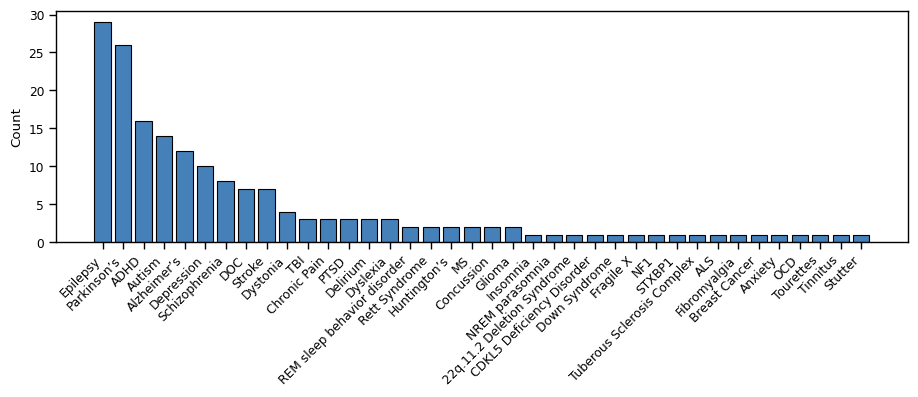

In [16]:
# Plot the histogram of disorders
plot_hist(df, 'Disorder', figsize=(11, 3))

In [17]:
# Compute the disorder counts
disorder_counts = Counter(df['Disorder'])

In [18]:
# Check the number of disorders
n_disorders = len(disorder_counts)
print('Number of disorders: {}'.format(n_disorders))

Number of disorders: 38


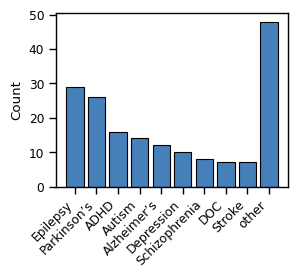

In [19]:
# Plot the histogram of disorders
plot_hist(replace_other(df, 'Disorder', 5), 'Disorder', end_label='other')
savefig(SAVE_FIG, 'reports-disorders.pdf', save_folder)

## Design

In [20]:
# Reassign multiple listings to 'multiple'
tdf = replace_multi_str(df, 'Design')

In [21]:
# Check value counts
tdf['Design'].value_counts()

Design
between     111
within       54
multiple     12
Name: count, dtype: int64

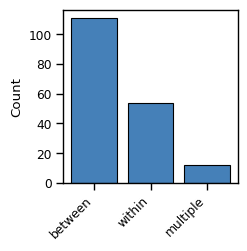

In [22]:
# Plot the histogram of design
plot_hist(tdf, 'Design', figsize=(2.25, 2.25))
savefig(SAVE_FIG, 'reports-design.pdf', save_folder)

### Analysis

In [23]:
# Reassign multiple listings to 'multiple'
tdf = replace_multi_str(df, 'Analysis')

In [24]:
# Check value counts
tdf['Analysis'].value_counts()

Analysis
diagnostic    95
treatment     22
multiple      20
state         17
symptoms       9
prognosis      6
region         5
at risk        3
Name: count, dtype: int64

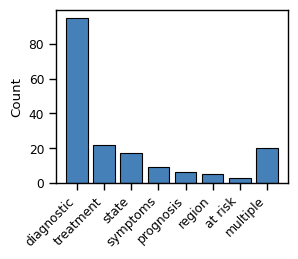

In [25]:
# Plot the histogram of analysis
plot_hist(tdf, 'Analysis', end_label='multiple')
savefig(SAVE_FIG, 'reports-analysis.pdf', save_folder)

## Publication Data

In [26]:
# Compute the counts per journal
journal_counts = Counter(df['Journal'].values)

In [27]:
n_preprints = journal_counts.pop('preprint')
print('Number of preprints: {}'.format(n_preprints))

Number of preprints: 19


In [28]:
# Check the number of journals
n_journals = len(journal_counts)
print('Number of journals: {}'.format(n_journals))

Number of journals: 94


In [29]:
# Check the most common journals
journal_counts.most_common(12)

[('Brain Communications', 8),
 ('Scientific Reports', 6),
 ('eLife', 4),
 ('Translational Psychiatry', 4),
 ("NPJ Parkinson's Disease", 4),
 ('European Journal of Neuroscience', 4),
 ('Biological Psychiatry: Cognitive Neuroscience and Neuroimaging', 3),
 ('Journal of Neurophysiology', 3),
 ('Cerebral Cortex', 3),
 ('Clinical Neurophysiology', 3),
 ('Molecular Autism', 3),
 ('Clinical EEG and Neuroscience', 3)]

### Check other values

In [30]:
# Check that publication details are unique values
assert len(set(df['DOI'])) == len(df['DOI'])
assert len(set(df['Title'])) == len(df['Title'])

## Recording Information

### Data Modality

In [31]:
# Reassign multiple listings to 'multiple'
tdf = replace_multi_str(df, 'Data')

In [32]:
# Check value counts
tdf['Data'].value_counts()

Data
EEG         118
MEG          24
DBS          22
iEEG          8
multiple      3
RNS           2
Name: count, dtype: int64

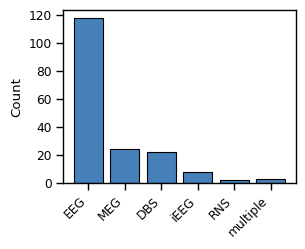

In [33]:
# Plot the histogram of data modalities
plot_hist(tdf, 'Data', end_label='multiple')
savefig(SAVE_FIG, 'reports-modalities.pdf', save_folder)

#### Check modalities by disorder

In [34]:
# Replace non-main disorders with other, and replace multi counts
tdf = replace_multi_str(replace_other(df, 'Disorder', 5), 'Data')

In [35]:
# Create pivot table for recording modality by diagnosis
pd.pivot_table(tdf, columns=['Data'], index=['Disorder'], aggfunc='size')

Data,DBS,EEG,MEG,RNS,iEEG,multiple
Disorder,,,,,,
ADHD,0,16,0,0,0,0
Autism,0,12,2,0,0,0
Alzheimer’s,0,8,3,0,0,1
Depression,3,7,0,0,0,0
DOC,0,7,0,0,0,0
Epilepsy,2,11,4,2,8,2
Parkinson’s,12,8,6,0,0,0
Schizophrenia,0,7,1,0,0,0
Stroke,0,5,2,0,0,0


### Analyzed Data

In [36]:
# Check value counts
tdf['Analyzed Data'].value_counts()

Analyzed Data
resting           111
task               13
events             11
sleep              10
video               9
intraoperative      7
unconscious         6
samples             4
baseline            3
unclear             1
meditation          1
movement            1
Name: count, dtype: int64

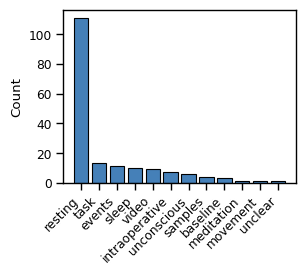

In [37]:
# Plot histogram of analyzed data
plot_hist(df, 'Analyzed Data', end_label='unclear')
savefig(SAVE_FIG, 'reports-analyzed-data.pdf', save_folder)

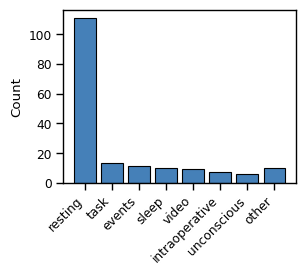

In [38]:
# Plot histogram of analyzed data
plot_hist(replace_other(df, 'Analyzed Data', 6), 'Analyzed Data', end_label='other')
savefig(SAVE_FIG, 'reports-analyzed-data-min.pdf', save_folder)

### Amount of Data

In [39]:
# Get the amount of data for resting state studies
tdf = df[df['Analyzed Data'] == 'resting']
tdf = tdf[tdf['Amount of Data'] != 'unclear']
tdf = replace_multi_first(tdf, 'Amount of Data')
data_lengths = pd.to_timedelta(tdf['Amount of Data'])

In [40]:
# Check the average length of resting state comparisons
print('Number of values: ', len(data_lengths))
print('Median  length: ', data_lengths.median())
print('Minimum length: ', data_lengths.min())
print('Maximum length: ', data_lengths.max())

Number of values:  105
Median  length:  0 days 00:05:00
Minimum length:  0 days 00:00:20
Maximum length:  0 days 00:40:00


In [41]:
# Check number of studies less than specified lengths
for nmin in [1, 2, 3, 4, 5]:
    print('# < {} minute:'.format(str(nmin)), sum(data_lengths < pd.to_timedelta(str(nmin) + 'm')))

# < 1 minute: 2
# < 2 minute: 9
# < 3 minute: 24
# < 4 minute: 42
# < 5 minute: 47


## Dataset Information

In [42]:
# Check total numbers of participants per group
print('Total # patients: {:5d}'.format(int(np.nansum(df['# Patients']))))
print('Total # controls: {:5d}'.format(int(np.nansum(df['# Control']))))

Total # patients: 10565
Total # controls:  7313


In [43]:
# Check the average number of participants per group
print('Average # patients: \t{:1.0f}  +/- {:6.2f} [{:2.0f} - {:4.0f}]'.format(\
    np.nanmedian(df['# Patients']), np.nanstd(df['# Patients']),
    np.nanmin(df['# Patients']), np.nanmax(df['# Patients'])))
print('Average # controls: \t{:1.0f}  +/- {:6.2f} [{:2.0f} - {:4.0f}]'.format(\
    np.nanmedian(df['# Control']), np.nanstd(df['# Control']),
    np.nanmin(df['# Control']), np.nanmax(df['# Control'])))

Average # patients: 	32  +/-  99.96 [ 1 - 1038]
Average # controls: 	36  +/-  90.57 [ 6 -  732]


In [44]:
# Check how many case studies
n_case_studies = len(df[df['# Patients'] == 1])
print('Case studies (n=1): \t {}'.format(n_case_studies))

Case studies (n=1): 	 5


In [45]:
# Check how many large studies there are
for size in [100, 250, 500]:
    print('Studies with n>{}: \t{}'.format(\
        size, len(df[df['# Patients'] >= size])))

Studies with n>100: 	20
Studies with n>250: 	7
Studies with n>500: 	1


In [46]:
# Check the number of patients per diagnosis
rdf = replace_other(df, 'Disorder', 5)
for disorder in set(rdf['Disorder']):
    tdf = rdf[rdf['Disorder'] == disorder]
    print('{:20s} \t {:2.0f}  +/- {:6.2f} [{:2.0f} - {:4.0f}]'.format(\
        disorder, np.nanmedian(tdf['# Patients']), np.nanstd(tdf['# Patients']),
        np.nanmin(tdf['# Patients']), np.nanmax(tdf['# Patients'])))

other                	 29  +/-  79.29 [ 1 -  413]
Epilepsy             	 14  +/-  56.38 [ 1 -  307]
Schizophrenia        	 34  +/-  14.84 [14 -   58]
ADHD                 	 68  +/- 238.85 [19 - 1038]
Depression           	 39  +/-  34.54 [ 4 -  119]
Autism               	 74  +/- 111.49 [15 -  421]
Stroke               	 18  +/-  15.72 [13 -   61]
DOC                  	 49  +/-  80.04 [ 8 -  260]
Alzheimer’s          	 49  +/-  55.89 [10 -  230]
Parkinson’s          	 23  +/-  31.81 [ 7 -  146]


In [47]:
# Settings for plotting participant number histograms
brange = [0, 150]
bins = 25
n_hist_settings = {'sort' : False, 'rotate_x' : False, 'remove_xlabel' : False}

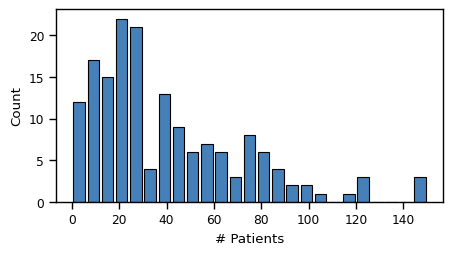

In [48]:
# Plot a histogram of the number of patients
plot_hist(df, '# Patients', figsize=(5, 2.5), binrange=brange, bins=bins, **n_hist_settings)

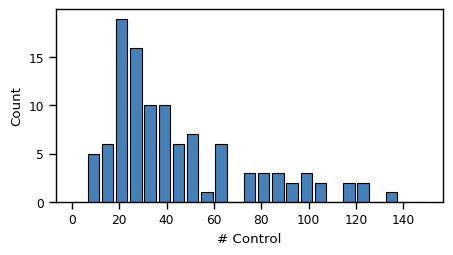

In [49]:
# Plot a histogram of the number of control participants
plot_hist(df, '# Control', figsize=(5, 2.5), binrange=brange, bins=bins, **n_hist_settings)

## Method Information

### Fit Methods

In [50]:
# Check value counts
df['Fit Method'].value_counts()

Fit Method
specparam     121
regression     32
irasa           9
Colombo         7
Bódizs          3
eBOSC           3
unclear         2
Name: count, dtype: int64

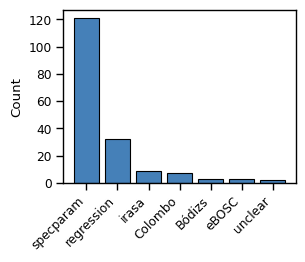

In [51]:
# Plot the histogram of fit methods
plot_hist(df, 'Fit Method', end_label='unclear')
savefig(SAVE_FIG, 'reports-fitmethod.pdf', save_folder)

## Results Information

In [52]:
# Check results counts, per research design
for treatment in ['diagnostic', 'treatment', 'state', 'prognosis', 'symptoms', 'region', 'at risk']:
    print('{:10s}\t'.format(treatment), count_results(df, treatment))

diagnostic	 {'total': 110, 'up': 35, 'down': 35, 'null': 34, 'unknown': 6}
treatment 	 {'total': 28, 'up': 11, 'down': 13, 'null': 4, 'unknown': 0}
state     	 {'total': 20, 'up': 12, 'down': 5, 'null': 0, 'unknown': 3}
prognosis 	 {'total': 12, 'up': 3, 'down': 5, 'null': 2, 'unknown': 2}
symptoms  	 {'total': 14, 'up': 6, 'down': 1, 'null': 4, 'unknown': 3}
region    	 {'total': 9, 'up': 7, 'down': 0, 'null': 0, 'unknown': 2}
at risk   	 {'total': 4, 'up': 3, 'down': 1, 'null': 0, 'unknown': 0}


### Interpretation

In [53]:
# Check value counts
df['Interpretation'].value_counts()

Interpretation
E/I ratio            103
unstated              37
slowing                8
neural noise           7
self-similarity        6
oscillations           4
criticality            3
synchronicity          3
timescale              2
complexity             2
integration            1
neurotransmission      1
Name: count, dtype: int64

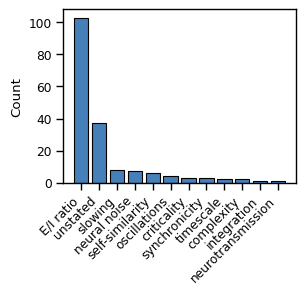

In [54]:
# Plot histogram of interpretations
plot_hist(df, 'Interpretation')
savefig(SAVE_FIG, 'reports-interpretations_all.pdf', save_folder)

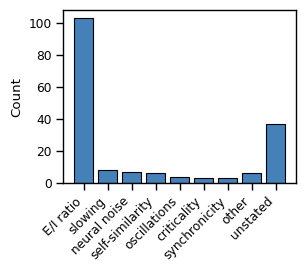

In [55]:
# Plot histogram of interpretations - sub-selected
plot_hist(replace_other(df, 'Interpretation', 3), 'Interpretation', end_label=['other', 'unstated'])
savefig(SAVE_FIG, 'reports-interpretations_min.pdf', save_folder)

### Biomarker

In [56]:
# Check value counts
df['Biomarker'].value_counts()

Biomarker
yes    98
no     79
Name: count, dtype: int64

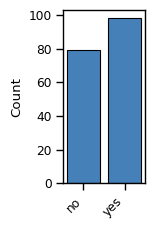

In [57]:
# Plot histogram of biomarker
plot_hist(df, 'Biomarker', sort=False, figsize=(1.05, 2.25))
savefig(SAVE_FIG, 'reports-biomarker.pdf', save_folder)

### Report Values

In [58]:
# Get the subset of total rows that report a clinical exponent 
dfr = df[np.logical_and(df['Clinical EXP'] != '-', df['Clinical EXP'] != 'unclear')]
len(dfr)

35

In [59]:
# Get the proportion of diagnostic comparisons that report a clinical exponent
diags = [True if 'diagnostic' in el else False for el in df['Analysis'].values]
tdf = df[diags]
dfr = tdf[np.logical_and(tdf['Clinical EXP'] != '-', tdf['Clinical EXP'] != 'unclear')]
print('Exponent value reporting: {} of {} diagnostic reports include values.'.format(len(dfr), len(tdf)))

Exponent value reporting: 28 of 110 diagnostic reports include values.


### Effect Size

In [60]:
# Check value counts
df['Report Effects Size'].value_counts()

Report Effects Size
no     129
yes     48
Name: count, dtype: int64

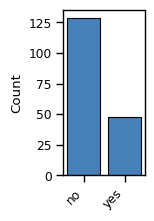

In [61]:
# Plot histogram of effect size
plot_hist(df, 'Report Effects Size', sort=False, figsize=(1.05, 2.15))
savefig(SAVE_FIG, 'reports-effectsize.pdf', save_folder)

In [62]:
# Subselected for report that include an effect size measure
dfe = df[df['Effect Size Measure'] != '-']

In [63]:
# Check value counts
dfe['Effect Size Measure'].value_counts()

Effect Size Measure
cohen’s-d                    18
eta-squared                  13
z-score                       5
Cohen’s d                     4
Hedge’s g                     2
AUC                           2
unclear                       1
biserial rank correlation     1
cohen’s f^2                   1
log(odds)                     1
Name: count, dtype: int64

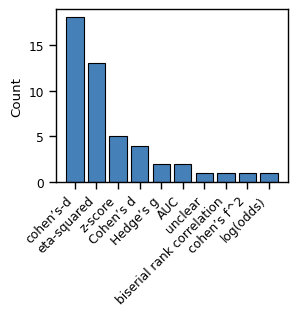

In [64]:
# Plot histogram of effect size measures
plot_hist(dfe, 'Effect Size Measure')
savefig(SAVE_FIG, 'reports-effectsize-measures.pdf', save_folder)

## Method Reporting

In [65]:
# Subselect to specparam fitting method
cdf = df[df['Fit Method'] == 'specparam'].copy()

In [66]:
# Compute how many reports report settings & GOF
rep_set = sum(cdf['Report Settings'] == 'yes') / len(cdf)
rep_gof = sum(cdf['Report GOF'] == 'yes') / len(cdf)

In [67]:
print('Reports settings:   {:4.2f}%'.format(rep_set * 100))
print('Reports GOF:        {:4.2f}%'.format(rep_gof * 100))

Reports settings:   57.85%
Reports GOF:        28.10%


In [68]:
# Order values for plotting 
cdf['Report Settings'] = pd.Categorical(cdf['Report Settings'], ['yes', 'no'])
cdf['Report GOF'] = pd.Categorical(cdf['Report GOF'], ['yes', 'no'])

In [69]:
# Check value counts
cdf['Report Settings'].value_counts()

Report Settings
yes    70
no     51
Name: count, dtype: int64

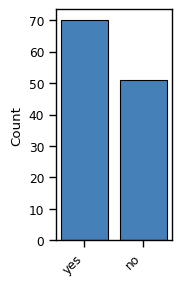

In [70]:
# Plot settings reporting
plot_hist(cdf, 'Report Settings', sort=False, figsize=(1.5, 3))
savefig(SAVE_FIG, 'reports-reportssettings.pdf', save_folder)

In [71]:
# Check value counts
cdf['Report GOF'].value_counts()

Report GOF
no     87
yes    34
Name: count, dtype: int64

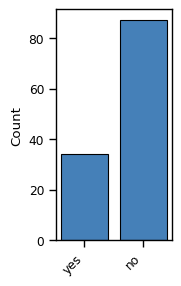

In [72]:
# Plot GOF reporting
plot_hist(cdf, 'Report GOF', sort=False, figsize=(1.5, 3))
savefig(SAVE_FIG, 'reports-reportsgof.pdf', save_folder)